<img src = "https://upload.wikimedia.org/wikipedia/commons/e/e7/YuNaKimInVancouver.jpg" width = 400> </a>

<h2>Battling the Neighborhoods in L.A.: find a place for Korean    BBQ & Cafe</h2>


The goal of my project is to find a good place in the USA for Korean restaurants and coffee cafes. Champion figure skater Yuna Kim is funding a Korean food start-up restaurant and wants to be in a city suitable for patio weather and LA is a great place. The start-up is nterested in serving Korean BBQ one side of the venue with a division wall where they want have a donut shop that serves gourmet hot/cold teas and coffee. This project is intended to help with location.

I will survey the territory with 500 meters of Koreatown utilizing my Foursquare API connection and python notebooks along. The results will be prepared in the form of tables and interactive Geomap that shows the location of the ideal location and other areas of Coffee Shop saturation, and the neighborhood's most common venue should ideally be a Korean restaurant with few coffee shops.

<h1>STOP! View fully run project here 
<a href="https://nbviewer.jupyter.org/github/RobFaj/Capstone-DataScience/blob/master/Battling%20Neighborhoods_template_8.15-Copy1%20%281%29.ipynb">
Click here View fully run project here </a></h1>




In [2]:
#install conda geopy and folium
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

!pip install folium==0.5.0
#pip install geopy



     |████████████████████████████████| 81kB 4.2MB/s eta 0:00:011
  Stored in directory: /home/dsxuser/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium


In [3]:
!pip install geopy

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
#!wget -q -O 'LA_data.json' https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
#print('Data downloaded!')

In [3]:
#LA_data.head()

<h3> Understanding and Processing LA Neighborhood Data First</h3>

In [4]:
import pandas as pd
df_LA=pd.read_csv("https://usc.data.socrata.com/api/views/9utn-waje/rows.csv?accessType=DOWNLOAD&bom=true&format=true")
df_LA.head()

,set,slug,the_geom,kind,external_i,name,display_na,sqmi,type,name_1,slug_1,latitude,longitude,location
0,L.A. County Neighborhoods (Current),acton,MULTIPOLYGON (((-118.20261747920541 34.5389897...,L.A. County Neighborhood (Current),acton,Acton,Acton L.A. County Neighborhood (Current),39.339109,unincorporated-area,NaN,NaN,-118.169810,34.497355,POINT(34.497355239240846 -118.16981019229348)
1,L.A. County Neighborhoods (Current),adams-normandie,MULTIPOLYGON (((-118.30900800000012 34.0374109...,L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,Adams-Normandie L.A. County Neighborhood (Curr...,0.805350,segment-of-a-city,NaN,NaN,-118.300208,34.031461,POINT(34.031461499124156 -118.30020800000011)
2,L.A. County Neighborhoods (Current),agoura-hills,MULTIPOLYGON (((-118.76192500000009 34.1682029...,L.A. County Neighborhood (Current),agoura-hills,Agoura Hills,Agoura Hills L.A. County Neighborhood (Current),8.146760,standalone-city,NaN,NaN,-118.759885,34.146736,POINT(34.146736499122795 -118.75988450000015)
3,L.A. County Neighborhoods (Current),agua-dulce,MULTIPOLYGON (((-118.2546773959221 34.55830403...,L.A. County Neighborhood (Current),agua-dulce,Agua Dulce,Agua Dulce L.A. County Neighborhood (Current),31.462632,unincorporated-area,NaN,NaN,-118.317104,34.504927,POINT(34.504926999796837 -118.3171036690717)
4,L.A. County Neighborhoods (Current),alhambra,MULTIPOLYGON (((-118.12174700000014 34.1050399...,L.A. County Neighborhood (Current),alhambra,Alhambra,Alhambra L.A. County Neighborhood (Current),7.623814,standalone-city,NaN,NaN,-118.136512,34.085539,POINT(34.085538999123571 -118.13651200000021)


In [5]:
df1_LA = df_LA[['set','name','latitude','longitude']]

In [6]:
df1_LA.head()

,set,name,latitude,longitude
0,L.A. County Neighborhoods (Current),Acton,-118.169810,34.497355
1,L.A. County Neighborhoods (Current),Adams-Normandie,-118.300208,34.031461
2,L.A. County Neighborhoods (Current),Agoura Hills,-118.759885,34.146736
3,L.A. County Neighborhoods (Current),Agua Dulce,-118.317104,34.504927
4,L.A. County Neighborhoods (Current),Alhambra,-118.136512,34.085539


In [7]:
print('The LA dataframe has {} neighborhoods.'.format(
        len(df1_LA['name'].unique()),
        df1_LA.shape[0]
    )
)

The LA dataframe has 272 neighborhoods.


In [8]:
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


In [9]:
LA_data = df1_LA[df1_LA['set'] == 'L.A. County Neighborhoods (Current)'].reset_index(drop=True)
LA_data.head()

,set,name,latitude,longitude
0,L.A. County Neighborhoods (Current),Acton,-118.169810,34.497355
1,L.A. County Neighborhoods (Current),Adams-Normandie,-118.300208,34.031461
2,L.A. County Neighborhoods (Current),Agoura Hills,-118.759885,34.146736
3,L.A. County Neighborhoods (Current),Agua Dulce,-118.317104,34.504927
4,L.A. County Neighborhoods (Current),Alhambra,-118.136512,34.085539


In [10]:
CLIENT_ID = 'EZNZI2RCAYZGJSRALET004Y44IDJLU3A4SOM44SM3ZVAQ3WC' # your Foursquare ID
CLIENT_SECRET = 'RM5YUKT10M10DOVAXQIMAAA2QOXQPU1ZOQEMF55SVNPNNOTD' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EZNZI2RCAYZGJSRALET004Y44IDJLU3A4SOM44SM3ZVAQ3WC
CLIENT_SECRET:RM5YUKT10M10DOVAXQIMAAA2QOXQPU1ZOQEMF55SVNPNNOTD


In [11]:
LA_data.loc[[28], 'name']

28    Koreatown
Name: name, dtype: object

In [32]:
neighborhood_latitude = LA_data.loc[28, 'longitude'] # neighborhood latitude value
neighborhood_longitude = LA_data.loc[28, 'latitude'] # neighborhood longitude value

neighborhood_name = LA_data.loc[28, 'name'] # neighborhood_name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Koreatown are 34.06451049912376, -118.3049585.


In [57]:
# type your answer here
LIMIT=100 # number of venues

#define radius
radius = 3000

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=EZNZI2RCAYZGJSRALET004Y44IDJLU3A4SOM44SM3ZVAQ3WC&client_secret=RM5YUKT10M10DOVAXQIMAAA2QOXQPU1ZOQEMF55SVNPNNOTD&v=20180604&ll=34.06451049912376,-118.3049585&radius=3000&limit=100'

In [58]:
results = requests.get(url).json()

<h2>I know Koreatown is a great spot for nightlife!</h2>

In [59]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [60]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Seoul Pho,Vietnamese Restaurant,34.065871,-118.308796
1,BCD Tofu House,Korean Restaurant,34.061961,-118.302713
2,Ahgassi Gopchang,Korean Restaurant,34.063397,-118.303863
3,Jun Won,Korean Restaurant,34.066871,-118.308867
4,The Normandie Club,Hotel Bar,34.063555,-118.300856


In [61]:
print('{} venues were returned by Foursquare for Koreatown area.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare for Koreatown area.


## 2. Exploring the Neighborhoods in LA

In [62]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][28]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [63]:
nearby_venues.head()

,name,categories,lat,lng
0,Seoul Pho,Vietnamese Restaurant,34.065871,-118.308796
1,BCD Tofu House,Korean Restaurant,34.061961,-118.302713
2,Ahgassi Gopchang,Korean Restaurant,34.063397,-118.303863
3,Jun Won,Korean Restaurant,34.066871,-118.308867
4,The Normandie Club,Hotel Bar,34.063555,-118.300856


In [64]:
nearby_venues.groupby('categories').count()

,name,lat,lng
categories,,,
Arcade,1,1,1
Art Museum,1,1,1
Asian Restaurant,1,1,1
BBQ Joint,2,2,2
Bakery,4,4,4
Bar,1,1,1
Brazilian Restaurant,2,2,2
Bubble Tea Shop,2,2,2
Burger Joint,2,2,2


In [65]:
print('There are {} uniques categories.'.format(len(nearby_venues['name'].unique())))

There are 99 uniques categories.


In [66]:
nearby_venues.shape

(100, 4)

In [67]:
nearby_venues.columns = ['Venue Name', 'Category', 'Lat', 'Lng']
nearby_venues.head()

,Venue Name,Category,Lat,Lng
0,Seoul Pho,Vietnamese Restaurant,34.065871,-118.308796
1,BCD Tofu House,Korean Restaurant,34.061961,-118.302713
2,Ahgassi Gopchang,Korean Restaurant,34.063397,-118.303863
3,Jun Won,Korean Restaurant,34.066871,-118.308867
4,The Normandie Club,Hotel Bar,34.063555,-118.300856


In [68]:
#bar graph






In [69]:
LA_onehot = pd.get_dummies(nearby_venues['Category'], prefix="", prefix_sep="")

In [70]:
# add neighborhood_name column back to dataframe
LA_onehot['Neighborhood_name'] = LA_data['name'] 
LA_onehot.head()

,Arcade,Art Museum,Asian Restaurant,BBQ Joint,Bakery,Bar,Brazilian Restaurant,Bubble Tea Shop,Burger Joint,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Dessert Shop,Dive Bar,Donut Shop,Dumpling Restaurant,Food,Food Truck,Grocery Store,Health & Beauty Service,Hotel,Hotel Bar,Ice Cream Shop,Japanese Restaurant,Juice Bar,Korean Restaurant,Lounge,Mexican Restaurant,Pub,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shopping Mall,South American Restaurant,Spa,Speakeasy,Steakhouse,Sushi Restaurant,Thai Restaurant,Video Game Store,Vietnamese Restaurant,Neighborhood_name
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Acton
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adams-Normandie
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agoura Hills
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agua Dulce
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Alhambra


In [71]:
# I'm getting somewhere stopped here 


# move neighborhood column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,Neighborhood_name,Arcade,Art Museum,Asian Restaurant,BBQ Joint,Bakery,Bar,Brazilian Restaurant,Bubble Tea Shop,Burger Joint,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Dessert Shop,Dive Bar,Donut Shop,Dumpling Restaurant,Food,Food Truck,Grocery Store,Health & Beauty Service,Hotel,Hotel Bar,Ice Cream Shop,Japanese Restaurant,Juice Bar,Korean Restaurant,Lounge,Mexican Restaurant,Pub,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shopping Mall,South American Restaurant,Spa,Speakeasy,Steakhouse,Sushi Restaurant,Thai Restaurant,Video Game Store,Vietnamese Restaurant
0,Acton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Adams-Normandie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Agoura Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Agua Dulce,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alhambra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
#grouped = venues_onehot.groupby('Street').mean().reset_index()
#grouped


LA_venues_grouped= LA_onehot.groupby('Neighborhood_name').mean().reset_index()
LA_venues_grouped.head()

,Neighborhood_name,Arcade,Art Museum,Asian Restaurant,BBQ Joint,Bakery,Bar,Brazilian Restaurant,Bubble Tea Shop,Burger Joint,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Dessert Shop,Dive Bar,Donut Shop,Dumpling Restaurant,Food,Food Truck,Grocery Store,Health & Beauty Service,Hotel,Hotel Bar,Ice Cream Shop,Japanese Restaurant,Juice Bar,Korean Restaurant,Lounge,Mexican Restaurant,Pub,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shopping Mall,South American Restaurant,Spa,Speakeasy,Steakhouse,Sushi Restaurant,Thai Restaurant,Video Game Store,Vietnamese Restaurant
0,Acton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Adams-Normandie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Agoura Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Agua Dulce,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alhambra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
LA_venues_grouped.shape

(100, 46)

In [74]:
num_top_venues = 5

for hood in LA_venues_grouped['Neighborhood_name']:
    print("----"+hood+"----")
    temp = LA_venues_grouped[LA_venues_grouped['Neighborhood_name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acton----
                     venue  freq
0    Vietnamese Restaurant   1.0
1  Health & Beauty Service   0.0
2                Hotel Bar   0.0
3           Ice Cream Shop   0.0
4      Japanese Restaurant   0.0


----Adams-Normandie----
                     venue  freq
0        Korean Restaurant   1.0
1                   Arcade   0.0
2  Health & Beauty Service   0.0
3                Hotel Bar   0.0
4           Ice Cream Shop   0.0


----Agoura Hills----
                     venue  freq
0        Korean Restaurant   1.0
1                   Arcade   0.0
2  Health & Beauty Service   0.0
3                Hotel Bar   0.0
4           Ice Cream Shop   0.0


----Agua Dulce----
                     venue  freq
0        Korean Restaurant   1.0
1                   Arcade   0.0
2  Health & Beauty Service   0.0
3                Hotel Bar   0.0
4           Ice Cream Shop   0.0


----Alhambra----
                     venue  freq
0                Hotel Bar   1.0
1                   Arcade   0.0
2  Hea

                venue  freq
0           Speakeasy   1.0
1              Arcade   0.0
2  Salon / Barbershop   0.0
3           Hotel Bar   0.0
4      Ice Cream Shop   0.0


----Chatsworth----
                     venue  freq
0            Grocery Store   1.0
1  Health & Beauty Service   0.0
2                Hotel Bar   0.0
3           Ice Cream Shop   0.0
4      Japanese Restaurant   0.0


----Chatsworth Reservoir----
                     venue  freq
0      Japanese Restaurant   1.0
1                   Arcade   0.0
2  Health & Beauty Service   0.0
3                Hotel Bar   0.0
4           Ice Cream Shop   0.0


----Chesterfield Square----
                venue  freq
0  Seafood Restaurant   1.0
1              Arcade   0.0
2  Salon / Barbershop   0.0
3           Hotel Bar   0.0
4      Ice Cream Shop   0.0


----Cheviot Hills----
                     venue  freq
0                Juice Bar   1.0
1                   Arcade   0.0
2  Health & Beauty Service   0.0
3                Hotel Bar   0

                     venue  freq
0        Korean Restaurant   1.0
1                   Arcade   0.0
2  Health & Beauty Service   0.0
3                Hotel Bar   0.0
4           Ice Cream Shop   0.0


----Glendora----
                     venue  freq
0        Korean Restaurant   1.0
1                   Arcade   0.0
2  Health & Beauty Service   0.0
3                Hotel Bar   0.0
4           Ice Cream Shop   0.0


----Gramercy Park----
                venue  freq
0    Video Game Store   1.0
1              Arcade   0.0
2  Salon / Barbershop   0.0
3           Hotel Bar   0.0
4      Ice Cream Shop   0.0


----Granada Hills----
            venue  freq
0          Bakery   1.0
1          Arcade   0.0
2  Sandwich Place   0.0
3       Hotel Bar   0.0
4  Ice Cream Shop   0.0


----Green Meadows----
                venue  freq
0                 Spa   1.0
1              Arcade   0.0
2  Salon / Barbershop   0.0
3           Hotel Bar   0.0
4      Ice Cream Shop   0.0


----Green Valley----
          

In [75]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [76]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood_name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood_name'] = LA_venues_grouped['Neighborhood_name']

for ind in np.arange(LA_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LA_venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Acton,Vietnamese Restaurant,Food Truck,Dumpling Restaurant,Donut Shop,Dive Bar
1,Adams-Normandie,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
2,Agoura Hills,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
3,Agua Dulce,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
4,Alhambra,Hotel Bar,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
5,Alondra Park,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
6,Altadena,Concert Hall,Vietnamese Restaurant,Food Truck,Dumpling Restaurant,Donut Shop
7,Angeles Crest,Grocery Store,Food Truck,Dumpling Restaurant,Donut Shop,Dive Bar
8,Arcadia,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
9,Arleta,Coffee Shop,Vietnamese Restaurant,Food Truck,Dumpling Restaurant,Donut Shop


In [77]:
#select neighborhoods where 1stMost Common Venue Korean rest. and 2nd most common venue is Coffee Shop
#I need to establish a venue of Korean BBQ and Boba tea in the area.

df_Korean1st= neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['1st Most Common Venue'] == 'Korean Restaurant']

df_Korean1st

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Adams-Normandie,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
2,Agoura Hills,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
3,Agua Dulce,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
5,Alondra Park,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
8,Arcadia,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
10,Arlington Heights,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
18,Baldwin Park,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
19,Bel-Air,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
20,Bell,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
22,Bellflower,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop


In [78]:
df_Coffee1st= neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['1st Most Common Venue'] == 'Coffee Shop']

df_Coffee1st

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,Arleta,Coffee Shop,Vietnamese Restaurant,Food Truck,Dumpling Restaurant,Donut Shop
47,Citrus,Coffee Shop,Vietnamese Restaurant,Food Truck,Dumpling Restaurant,Donut Shop
68,East San Gabriel,Coffee Shop,Vietnamese Restaurant,Food Truck,Dumpling Restaurant,Donut Shop
90,Hacienda Heights,Coffee Shop,Vietnamese Restaurant,Food Truck,Dumpling Restaurant,Donut Shop
94,Koreatown,Coffee Shop,Vietnamese Restaurant,Food Truck,Dumpling Restaurant,Donut Shop


In [79]:
df_Coff_Kor= [df_Korean1st,df_Coffee1st]
result = pd.concat(df_Coff_Kor)

result

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Adams-Normandie,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
2,Agoura Hills,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
3,Agua Dulce,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
5,Alondra Park,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
8,Arcadia,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
10,Arlington Heights,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
18,Baldwin Park,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
19,Bel-Air,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
20,Bell,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop
22,Bellflower,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop


In [80]:
result_location = result.join(LA_data.set_index('name'), on='Neighborhood_name')
result_location

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,set,latitude,longitude
1,Adams-Normandie,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.300208,34.031461
2,Agoura Hills,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.759885,34.146736
3,Agua Dulce,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.317104,34.504927
5,Alondra Park,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.335156,33.889617
8,Arcadia,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.030419,34.133230
10,Arlington Heights,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.323408,34.044910
18,Baldwin Park,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-117.975191,34.081109
19,Bel-Air,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.458416,34.102057
20,Bell,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.179166,33.981161
22,Bellflower,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.129032,33.888013


In [81]:
#df results
result_location['lng'] = result_location['latitude'] 
result_location.head()




,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,set,latitude,longitude,lng
1,Adams-Normandie,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.300208,34.031461,-118.300208
2,Agoura Hills,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.759885,34.146736,-118.759885
3,Agua Dulce,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.317104,34.504927,-118.317104
5,Alondra Park,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.335156,33.889617,-118.335156
8,Arcadia,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.030419,34.133230,-118.030419


In [82]:

result_location['lat'] = result_location['longitude'] 
result_location

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,set,latitude,longitude,lng,lat
1,Adams-Normandie,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.300208,34.031461,-118.300208,34.031461
2,Agoura Hills,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.759885,34.146736,-118.759885,34.146736
3,Agua Dulce,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.317104,34.504927,-118.317104,34.504927
5,Alondra Park,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.335156,33.889617,-118.335156,33.889617
8,Arcadia,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.030419,34.133230,-118.030419,34.133230
10,Arlington Heights,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.323408,34.044910,-118.323408,34.044910
18,Baldwin Park,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-117.975191,34.081109,-117.975191,34.081109
19,Bel-Air,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.458416,34.102057,-118.458416,34.102057
20,Bell,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.179166,33.981161,-118.179166,33.981161
22,Bellflower,Korean Restaurant,Vietnamese Restaurant,Clothing Store,Dumpling Restaurant,Donut Shop,L.A. County Neighborhoods (Current),-118.129032,33.888013,-118.129032,33.888013


In [83]:
result_location.shape

(38, 11)

<h2> Based on the above table, Acton is the only predominantly location for Korean Restaurants.</h2>
Conveniently, coffee shops are not on their top 5 lists of venues. 

__Make a Map of the Neighborhoods and Venues within top two picks__


<h3> Make maps here</h3>

In [92]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=8) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Acton
#folium.features.CircleMarker(
 #   [lat, lng],
  #  radius=10,
   # color='red',
    #popup='Citrus',
#    fill = True,
 #   fill_color = 'red',
  #  fill_opacity = 0.6
# ).add_to(venues_map)

folium.Marker(
    location=[34.497355, -118.169810],
    popup='Acton, Los Angeles',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, Neighborhood_name in zip(result_location.lat, result_location.lng, result_location.Neighborhood_name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        #popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)



# display map
venues_map

The blue respresent the neighborhoods where Coffee Shops are the 1st most common venues otherwise listed as having a high concentration of coffee shops. 
Acton, Los Angeles (labels by the red drop dot) is secluded from these high coffee shop concesntrations and therefore represents a potential for growht in 
expanding the LA coffee drinking market to the Korean Resturant area.  While catering to the Korean Restaurant foods and open in the late evening hours,
caffeine drinks and possibly alcohol infusions will make a nice post concert hall evening. 

<h3>Make Bar Charts Here of Top Restaurants</h3>

In [42]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [85]:
test=nearby_venues
test.head()

,Venue Name,Category,Lat,Lng
0,Seoul Pho,Vietnamese Restaurant,34.065871,-118.308796
1,BCD Tofu House,Korean Restaurant,34.061961,-118.302713
2,Ahgassi Gopchang,Korean Restaurant,34.063397,-118.303863
3,Jun Won,Korean Restaurant,34.066871,-118.308867
4,The Normandie Club,Hotel Bar,34.063555,-118.300856


In [86]:
# add neighborhood_name column back to dataframe
test['Neighborhood_name'] = LA_data['name'] 

In [87]:
# step 1 get data set and ready 
LA_Korea=test[['Neighborhood_name','Category']]

In [88]:
LA_Korea.head()

,Neighborhood_name,Category
0,Acton,Vietnamese Restaurant
1,Adams-Normandie,Korean Restaurant
2,Agoura Hills,Korean Restaurant
3,Agua Dulce,Korean Restaurant
4,Alhambra,Hotel Bar


In [89]:
LA_Korea.shape

(100, 2)

Text(0, 0.5, 'Frequency')

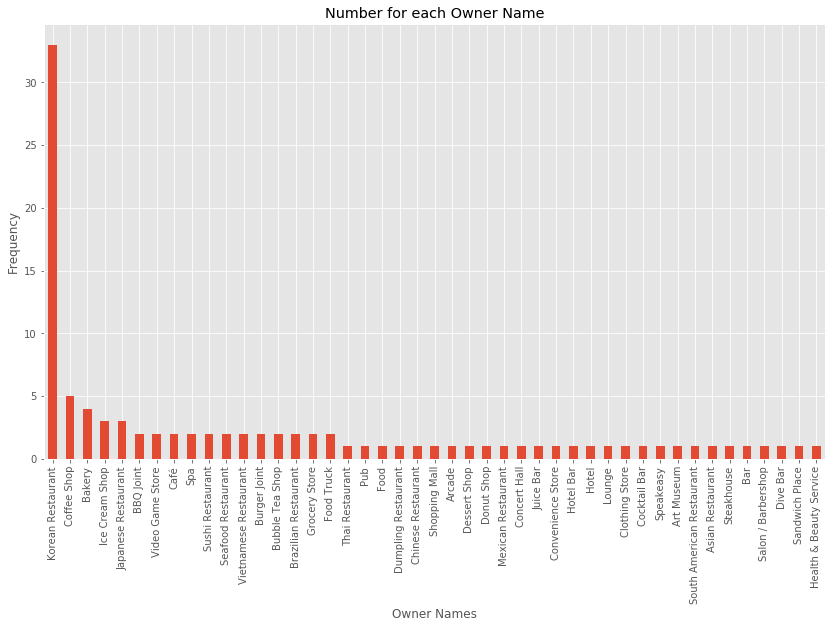

In [90]:
ax = LA_Korea['Category'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("Owner Names")
ax.set_ylabel("Frequency")

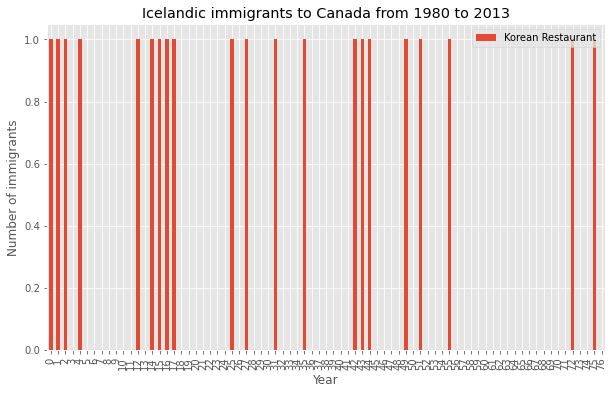

In [91]:
# step 2: plot data
def plot_bargraph_with_groupings(df, groupby, colourby, title, xlabel, ylabel):
    """
    Plots a dataframe showing the frequency of datapoints grouped by one column and coloured by another.
    df : dataframe
    groupby: the column to groupby
    colourby: the column to color by
    title: the graph title
    xlabel: the x label,
    ylabel: the y label
    """

    import matplotlib.patches as mpatches

    # Makes a mapping from the unique colourby column items to a random color.
    ind_col_map = {x:y for x, y in zip(df[colourby].unique(),
                               [plt.cm.Paired(np.arange(len(df[colourby].unique())))][0])}


    # Find when the indicies of the soon to be bar graphs colors.
    unique_comb = df[[groupby, colourby]].drop_duplicates()
    name_ind_map = {x:y for x, y in zip(unique_comb[groupby], unique_comb[colourby])}
    c = df[groupby].value_counts().index.map(lambda x: ind_col_map[name_ind_map[x]])

    # Makes the bargraph.
    ax = df[groupby].value_counts().plot(kind='bar',
                                         figsize=FIG_SIZE,
                                         title=title,
                                         color=[c.values])
    # Makes a legend using the ind_col_map
    legend_list = []
    for key in ind_col_map.keys():
        legend_list.append(mpatches.Patch(color=ind_col_map[key], label=key))

    # display the graph.
    plt.legend(handles=legend_list)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [84]:
# type your answer here

LA_venues = getNearbyVenues(names=LA_data['name'],
                                   latitudes=LA_data['latitude'],
                                   longitudes=LA_data['longitude']
                                  )



Acton


KeyError: 'groups'

In [57]:
LA_data.groupby('name').count().head()

,set,latitude,longitude
name,,,
Acton,1,1,1
Adams-Normandie,1,1,1
Agoura Hills,1,1,1
Agua Dulce,1,1,1
Alhambra,1,1,1


In [58]:
print('There are {} uniques categories.'.format(len(LA_data['set'].unique())))

There are 1 uniques categories.


In [59]:
LA_onehot = pd.get_dummies(nearby_venues[['set']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LA_onehot['name'] = LA_data['name'] 

# move neighborhood column to the first column
fixed_columns = [La_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

KeyError: "None of [Index(['set'], dtype='object')] are in the [columns]"